# EEP 153: Project 3
## Team Stanley Jevons: A Study of Two Different Eastern African Countries, Uganda & Tanzania

This Python notebook walks through all of our deliverables, so you can run it and check out how everything works in addition to verify we have met all of our deliverables. ***Click*** on the Table of Contents to be directed to any deliverable you want to see.

### Note to the reader: Please open this on DataHub!! The Table of Contents below will not work on Github - open and run everything with this DataHub link - [DataHub Link to this Python Notebook](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https://github.com/vishalival/eep153-stanley-jevons&urlpath=tree/eep153-stanley-jevons/deliverables_code_final_proj3.ipynb).

## Table of Contents and Deliverables
1. <a href="#deliverable-1a"><span style="color:red;">[Deliverable 1A]</span> - Choice of a Population, with supporting data</a>
2. <a href="#deliverable-2b"><span style="color:red;">[Deliverable 2B]</span> - Nutritional Content of Foods</a>
3. <a href="#deliverable-3b"><span style="color:red;">[Deliverable 3B]</span> - Nutritional Adequacy of Diet</a>
4. <a href="#deliverable-4a"><span style="color:red;">[Deliverable 4A]</span> - Estimate Demand System</a>
5. <a href="#deliverable-5c"><span style="color:red;">[Deliverable 5C]</span> - Counterfactual Experiments</a>

Run this code, to ensure everything runs properly. Might take an unusually long time (upper bound 1 min), sorry :O

In [ ]:
!pip install CFEDemands
import cfe
import numpy as np
from elasticity_module import output_as_pickle
import pandas as pd
import matplotlib.pyplot as plt

## 1. <span style="color:red">*Deliverable 1[A]*</span> - Choice of a Population, with Supporting Expenditure Data <a name="deliverable-1a"></a>

### Topics and Goals:

Our project focuses on East Africa, looking specifically at Uganda and Tanzania. Our project seeks to look at food consumption in both these countries, and whether the populations are meeting different dietary requirements (including but not limited to protein, vitamins etc.) We used this information to simulate different trade scenarios between the two countries that would help them gain foods and nutrients that they were deficient in, while exporting those that they had an abundance of. Additionally, we also looked at the impacts of climate change on the primary agricultural products produced in both countries 


Project Goals 

1. Explore primary agricultural production and consumption patterns in Uganda and Tanzania 
2. Determine which nutrients each country is deficient in, and which they meet requirements in 
3. Simulate food trade between the two countries to help each meet nutritional requirements 
4. Look into the effect of climate change agricultural production, and how this may impact prices and consumption patterns

In conclusion, our project shows that trade can help neighboring countries solve national nutritional deficiencies. 

We simulated a trade policy between Uganda and Tanzania, causing Kaldor Hicks improvements in the nutrition ratios of both countries. Particularly, the benefit of our trade is that Uganda’s population meeting/exceeding their protein requirements went from 58.29% → 87.71%, and Tanzania’s population meeting/exceeding their Vitamin C intake went from 23.18% → 86.09%.

![Map of East Africa](https://www.researchgate.net/publication/310007156/figure/fig1/AS:427675429937152@1478977176925/Map-of-East-Africa-Uganda-is-bordered-by-Kenya-from-the-East-Tanzania-from-the-south-and.png)

Some of the supporting expenditure data was found in the class's Edstem post, displayed here as Pandas Dataframes!

In [ ]:
tanzania_expenditure = pd.read_csv("data/tanzania/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")
tanzania_expenditure

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.0000,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.2500,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0856-001-001,2019-20,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,0856-001-003,2019-20,Zanzibar,2000.0000,NaN,3000.0,NaN,NaN,160.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,0857-001-001,2019-20,Zanzibar,3000.0000,NaN,3000.0,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,0858-001-001,2019-20,Dar Es Salaam,NaN,NaN,540.0,500.000000,NaN,300.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
uganda_expenditure = pd.read_csv("data/uganda/Uganda - Expenditures (2019-20).csv")
uganda_expenditure

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,1200.0,10000.0,NaN,NaN,2800.0,NaN,NaN,...,NaN,NaN,6000.0,100.0,1000.0,NaN,NaN,NaN,1000.0,NaN
3005,c33f6cb57d9849949e08a7350dabb829,2019-20,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,200.0,1000.0,NaN,NaN,NaN,NaN,NaN
3006,d10a687889de469687377204195f3db0,2019-20,Western,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
3007,d24fa50d02c041969a42102d8ebdadc9,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30000.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN


## 2. <span style="color:red">*Deliverable 2[B]*</span> - Nutritional Content of Foods <a name="deliverable-2b"></a>


For this deliverable, our team both looked to the information provided by the Uganda dataset in addition to curating our own nutritional content of foods dataset for Tanzania. For Tanzania, we were provided expenditure, household characteristics, and food price data, but we crafted our own dataset for the nutritional content. 

For this section, our team turned to:
- US Government's Food Data Central
- Articles on Food's Nutritional Contents

However, throughout this process, our team had to make many guided assumptions as some foods were too broad to be included specifically in the FDC's database, and some foods were too vague.

Run the following cell to check out the food dataset!

In [ ]:
fct = pd.read_csv("data/tanzania/Tanzania [Reformatted] - FCT.csv")
fct.head(10)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.480,0.870,10,0.0,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.680,0.630,480,3.0,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.000,0.000,0,0.0,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.000,0.082,0,0.0,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.870,4.160,0,0.0,3.800,0.0,17.00
5,Salt,0,0.00,0.0,0,50,0.00,0.00,0.000,0.000,0.000,0,0.0,0.000,0.0,0.00
6,Sugar,3870,0.00,0.0,0,10,1000.00,0.00,0.000,0.190,0.000,0,0.0,0.000,0.0,0.00
7,Tea (dry),1,0.00,0.0,5,0,0.30,0.02,0.000,0.014,0.000,0,0.0,0.000,0.0,0.02
8,0.01,27,2.85,1.6,116,68,4.07,1.26,0.551,0.194,0.077,283,0.0,0.195,26.5,0.45
9,Beef,2510,182.00,0.0,60,70,0.00,19.00,31.500,1.600,0.900,0,28.9,3.800,0.0,37.00


## 3. <span style="color:red">*Deliverable 3[B]*</span> - Nutritonal Adequacy of Diet <a name="deliverable-3b"></a>

For this section, our team used the different datasets and the work from lecture to develop nutritional adequacy means for the populations.

First, for Uganda:

In [ ]:
# Reading the expenditures dataset for Uganda
x_uganda = pd.read_csv("data/uganda/Uganda - Expenditures (2019-20).csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_uganda.columns:
    x_uganda['m'] = 1

# Setting a multi-level index
x_uganda = x_uganda.set_index(['i', 't', 'm'])
x_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_uganda = x_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_uganda = x_uganda.replace(0, np.nan)

# Reading the household characteristics dataset for Uganda
z_uganda = pd.read_csv("data/uganda/Uganda - HH Characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_uganda.columns:
    z_uganda['m'] = 1

# Setting a multi-level index
z_uganda = z_uganda.set_index(['i', 't', 'm'])
z_uganda.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_uganda = z_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the prices dataset for Uganda
p_uganda = pd.read_csv("data/uganda/Uganda - Prices.csv")

# If the 'm' column is not present, add it
if 'm' not in p_uganda.columns:
    p_uganda['m'] = 1

# Setting a multi-level index
p_uganda = p_uganda.set_index(['t', 'm'])
p_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_uganda = p_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_uganda = p_uganda.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Uganda
fct_uganda = pd.read_csv("data/uganda/Uganda - FCT.csv")

# Setting 'j' as the index
fct_uganda = fct_uganda.set_index('j')
fct_uganda.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_uganda = fct_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the Recommended Dietary Intakes (RDI) for Uganda
rdi_uganda = pd.read_csv("data/uganda/Uganda - RDI.csv")

# Setting 'n' as the index
rdi_uganda = rdi_uganda.set_index('n')
rdi_uganda.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

# Displaying the sorted beta values for Uganda
print("For Uganda:")
result_uganda.get_beta().sort_values(ascending=False)

For Uganda:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

Save those results.

In [ ]:
result_uganda.to_pickle('./foo_uganda.pickle')

Now it's Tanzania's turn!

In [ ]:
# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("data/tanzania/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("data/tanzania/Tanzania [Reformatted] - Household Characteristics (2019-20).csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("data/tanzania/Tanzania [Reformatted] - FCT.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# We use the same RDI for comparisons.
rdi_tanzania = pd.read_csv("data/uganda/Uganda - RDI.csv")

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

For Tanzania:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

In [ ]:
result_tanzania.to_pickle('./foo_tanzania.pickle')

In [ ]:
result = cfe.read_pickle('foo_uganda.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)
nutrient_ratio_uganda = (aligned_nutrients / aligned_hh_rwi).dropna()

nutrient_ratio_uganda

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_1708/1643506539.py:21: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)


n                                                   Energy   Protein  \
t       m       i                                                      
2019-20 Central 1013000201                        5.134721  5.098043   
                1013000202                        0.743429  1.081666   
                1013000204                        4.786251  5.222721   
                1021000108                        1.048122  1.058477   
                1021000109                        1.053957  1.205457   
...                                                    ...       ...   
        Western _62                               1.152294  1.656353   
                _67                               1.689057  2.300784   
                a98bebba177243668464e31f6d2bb92d  0.744737  1.027948   
                acb16f9b068549d8a80a37c9d638742f  0.608204  0.922646   
                d10a687889de469687377204195f3db0  0.658082  0.839498   

n                                                    Fiber    Folate  \
t       m       i                                                      
2019-20 Central 1013000201                        4.132305  3.873524   
                1013000202                        0.574476  0.776345   
                1013000204                        3.727186  4.596746   
                1021000108                        0.832093  0.912693   
                1021000109                        0.816208  0.960476   
...                                                    ...       ...   
        Western _62                               1.104845  1.316812   
                _67                               1.605007  2.031695   
                a98bebba177243668464e31f6d2bb92d  0.845978  0.853436   
                acb16f9b068549d8a80a37c9d638742f  0.610917  0.749131   
                d10a687889de469687377204195f3db0  0.670625  0.776954   

n                                                  Calcium  Carbohydrate  \
t       m       i                                                          
2019-20 Central 1013000201                        2.226907      7.438462   
                1013000202                        0.292498      0.783963   
                1013000204                        3.365932      9.615253   
                1021000108                        0.517780      1.474234   
                1021000109                        0.614087      1.746385   
...                                                    ...           ...   
        Western _62                               0.591646      2.271452   
                _67                               1.078246      4.454679   
                a98bebba177243668464e31f6d2bb92d  0.321050      1.646947   
                acb16f9b068549d8a80a37c9d638742f  0.271748      1.070940   
                d10a687889de469687377204195f3db0  0.320558      1.367045   

n                                                     Iron    Niacin  \
t       m       i                                                      
2019-20 Central 1013000201                        7.580828  4.557005   
                1013000202                        0.761054  0.761700   
                1013000204                        9.462395  5.024994   
                1021000108                        1.625111  0.928337   
                1021000109                        0.926896  1.084897   
...                                                    ...       ...   
        Western _62                               1.473452  1.473380   
                _67                               4.082491  2.215240   
                a98bebba177243668464e31f6d2bb92d  0.997279  0.960913   
                acb16f9b068549d8a80a37c9d638742f  0.718197  0.778769   
                d10a687889de469687377204195f3db0  1.163394  0.776283   

n                                                 Riboflavin   Thiamin  \
t       m       i                                                        
2019-20 Central 1013000201                          

In [ ]:
result = cfe.read_pickle('foo_tanzania.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania

n                                     Energy   Protein     Fiber    Folate  \
t       m             i                                                      
2019-20 Dar Es Salaam 0001-001-004  2.552530  2.902643  1.434663  1.546364   
                      0034-001-001  1.184993  1.299374  0.636021  0.620317   
                      0042-001-001  1.104204  1.362988  0.557508  0.529565   
                      0051-001-002  1.360813  1.465849  0.665924  0.735789   
                      0051-001-003  1.929961  2.227054  1.097113  0.947834   
...                                      ...       ...       ...       ...   
                      0686-001-001  2.086514  2.499240  1.038065  0.902201   
                      0701-003-001  1.628523  1.972202  0.809282  0.781307   
                      0809-001-008  2.378187  2.654472  1.359475  1.242819   
                      0858-001-001  0.893162  0.937225  0.385091  0.359444   
                      0858-001-002  1.581495  1.675595  0.749444  0.764996   

n                                    Calcium  Carbohydrate      Iron  \
t       m             i                                                
2019-20 Dar Es Salaam 0001-001-004  0.920107      7.884524  3.290193   
                      0034-001-001  0.282014      3.105873  0.976062   
                      0042-001-001  0.260044      2.658900  0.664128   
                      0051-001-002  0.424101      4.086091  1.569122   
                      0051-001-003  0.526130      4.722113  1.040701   
...                                      ...           ...       ...   
                      0686-001-001  0.448014      4.219678  1.115922   
                      0701-003-001  0.358233      3.385149  0.905769   
                      0809-001-008  0.745503      6.821273  1.611130   
                      0858-001-001  0.185485      2.258096  0.474672   
                      0858-001-002  0.316492      4.389482  1.096450   

n                                     Niacin  Riboflavin   Thiamin  Vitamin A  \
t       m             i                                                         
2019-20 Dar Es Salaam 0001-001-004  2.537535    1.978182  2.505049   0.773387   
                      0034-001-001  1.010614    0.840581  1.044155   0.360379   
                      0042-001-001  0.994753    0.729059  0.889846   0.266543   
                      0051-001-002  1.227464    0.942892  1.198431   0.291952   
                      0051-001-003  1.707394    1.415201  1.586332   0.670759   
...                                      ...         ...       ...        ...   
                      0686-001-001  1.696829    1.320873  1.519133   0.565476   
                      0701-003-001  1.413226    1.105201  1.313691   0.437491   
                      0809-001-008  2.219006    1.782360  2.093420   0.778123   
                      0858-001-001  0.729493    0.547716  0.657532   0.152355   
                      0858-001-002  1.290073    1.014299  1.284578   0.409987   

n                                   Vitamin B-12  Vitamin B-6  Vitamin C  \
t       m             i                                                    
2019-20 Dar Es Salaam 0001-001-004      3.218614     3.742231   1.762289   
                      0034-001-001      1.069863     1.361830   0.516678   
                      0042-001-001      1.120951     1.314766   0.573318   
                      0051-001-002      1.593039     1.664637   0.647833   
                      0051-001-003      2.020219     2.673769   1.465236   
...                                          ...          ...        ...   
                      0686-001-001      2.141827     2.497883   1.171721   
                      0701-003-001      1.629714     1.937080   0.830561   
                      0809-001-008      2.633638     3.359232   1.770262   
                      0858-001-001      0.846758     0.873132   0.297039   
                      0858-001-002      1.288922     1.873954   0.934363   

n    

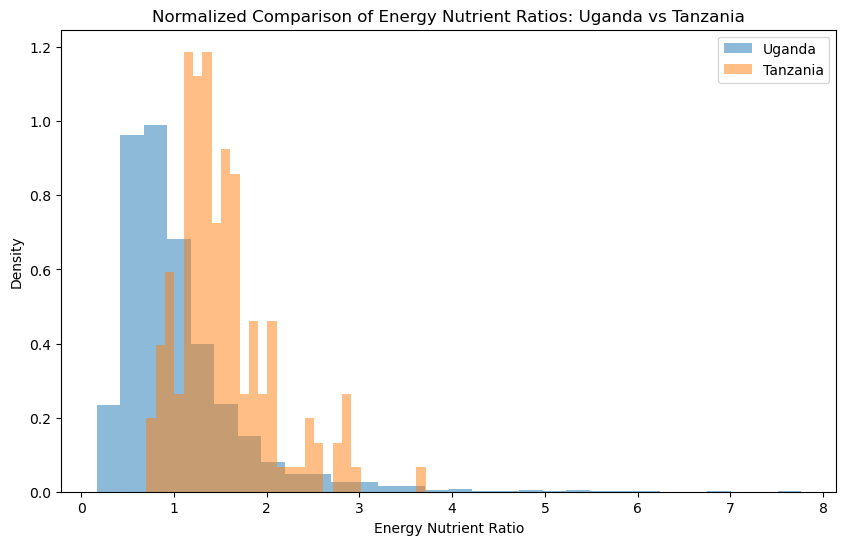

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Energy'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Energy'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Energy Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

The nutrient densities are very different, which is interesting!

What proportion of Ugandan households consume enough so that members will exceed dietary requirements?

In [ ]:
nutrient_ratio_uganda

n                                                   Energy   Protein  \
t       m       i                                                      
2019-20 Central 1013000201                        5.134721  5.098043   
                1013000202                        0.743429  1.081666   
                1013000204                        4.786251  5.222721   
                1021000108                        1.048122  1.058477   
                1021000109                        1.053957  1.205457   
...                                                    ...       ...   
        Western _62                               1.152294  1.656353   
                _67                               1.689057  2.300784   
                a98bebba177243668464e31f6d2bb92d  0.744737  1.027948   
                acb16f9b068549d8a80a37c9d638742f  0.608204  0.922646   
                d10a687889de469687377204195f3db0  0.658082  0.839498   

n                                                    Fiber    Folate  \
t       m       i                                                      
2019-20 Central 1013000201                        4.132305  3.873524   
                1013000202                        0.574476  0.776345   
                1013000204                        3.727186  4.596746   
                1021000108                        0.832093  0.912693   
                1021000109                        0.816208  0.960476   
...                                                    ...       ...   
        Western _62                               1.104845  1.316812   
                _67                               1.605007  2.031695   
                a98bebba177243668464e31f6d2bb92d  0.845978  0.853436   
                acb16f9b068549d8a80a37c9d638742f  0.610917  0.749131   
                d10a687889de469687377204195f3db0  0.670625  0.776954   

n                                                  Calcium  Carbohydrate  \
t       m       i                                                          
2019-20 Central 1013000201                        2.226907      7.438462   
                1013000202                        0.292498      0.783963   
                1013000204                        3.365932      9.615253   
                1021000108                        0.517780      1.474234   
                1021000109                        0.614087      1.746385   
...                                                    ...           ...   
        Western _62                               0.591646      2.271452   
                _67                               1.078246      4.454679   
                a98bebba177243668464e31f6d2bb92d  0.321050      1.646947   
                acb16f9b068549d8a80a37c9d638742f  0.271748      1.070940   
                d10a687889de469687377204195f3db0  0.320558      1.367045   

n                                                     Iron    Niacin  \
t       m       i                                                      
2019-20 Central 1013000201                        7.580828  4.557005   
                1013000202                        0.761054  0.761700   
                1013000204                        9.462395  5.024994   
                1021000108                        1.625111  0.928337   
                1021000109                        0.926896  1.084897   
...                                                    ...       ...   
        Western _62                               1.473452  1.473380   
                _67                               4.082491  2.215240   
                a98bebba177243668464e31f6d2bb92d  0.997279  0.960913   
                acb16f9b068549d8a80a37c9d638742f  0.718197  0.778769   
                d10a687889de469687377204195f3db0  1.163394  0.776283   

n                                                 Riboflavin   Thiamin  \
t       m       i                                                        
2019-20 Central 1013000201                          

How many people in Uganda VS Tanzania are exceeding energy goals?

In [ ]:
print("For Uganda:")
print((nutrient_ratio_uganda['Energy'] >= 1).mean())
print("For Tanzania:")
print((nutrient_ratio_tanzania['Energy'] >= 1).mean())

For Uganda:
0.3851576994434137
For Tanzania:
0.8807947019867549


What about protein goals?

In [ ]:
print("For Uganda:")
print((nutrient_ratio_uganda['Protein'] >= 1).mean())
print("For Tanzania:")
print((nutrient_ratio_tanzania['Protein'] >= 1).mean())

For Uganda:
0.5829313543599258
For Tanzania:
0.9403973509933775


## 4. <span style="color:red">*Deliverable 4[A]*</span> - Estimate Demand System <a name="deliverable-4a"></a>

We developed a module that would return elasticities for a given country with the data. We also did this on a wide variety of countries!

In [ ]:
tanzania_path_hh_characteristics = "data/tanzania/Tanzania [Reformatted] - Household Characteristics (2019-20).csv"
tanzania_path_expenditure = "data/tanzania/Tanzania [Reformatted] - Food Expenditures (2019-20).csv"
uganda_path_hh_characteristics = "data/uganda/Uganda - HH Characteristics.csv"
uganda_path_expenditure = "data/uganda/Uganda - Expenditures (2019-20).csv"

Let's try the function `output_as_pickle`, that will return the pickled elasticities!

In [ ]:
output_as_pickle(tanzania_path_expenditure, tanzania_path_hh_characteristics, "pickled_data/tanzania.pickle")
output_as_pickle(uganda_path_expenditure, uganda_path_hh_characteristics, "pickled_data/uganda.pickle")

Now, to use our results ...

In [ ]:
result_uganda = cfe.regression.read_pickle("pickled_data/uganda.pickle")
result_tanzania = cfe.regression.read_pickle("pickled_data/tanzania.pickle")

Text(0.5, 1.0, 'Uganda Elasticity by Food, sorted')

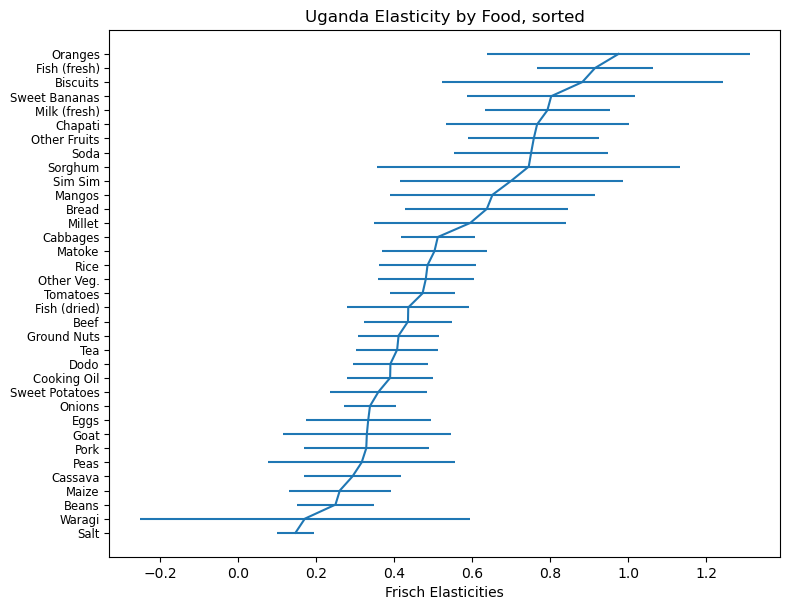

In [ ]:
result_uganda.graph_beta()
plt.title("Uganda Elasticity by Food, sorted")

Text(0.5, 1.0, 'Tanzania Elasticity by Food, sorted')

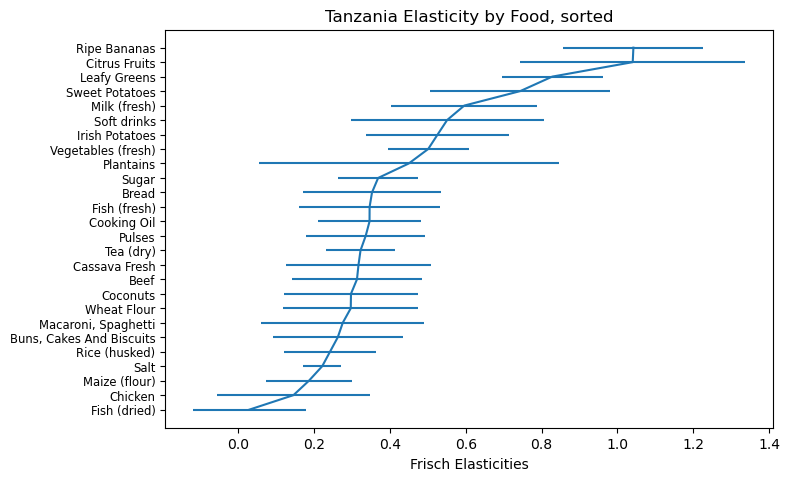

In [ ]:
result_tanzania.graph_beta()
plt.title("Tanzania Elasticity by Food, sorted")

For Uganda, this is how consumption will vary with household need, based on the breakdown of people in the household.

In [ ]:
result_uganda.get_gamma()

k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.129845,0.024727,0.064567,-0.028448,-0.002598,0.029310,0.084417,-0.071322,0.020194,0.036715,0.049218,0.042955,0.011466,0.107460,0.426698,8.409504
Beef,-0.121810,0.046408,0.033906,0.022340,0.084701,0.093669,0.222188,-0.008614,0.026050,0.016648,0.055342,0.080857,0.196879,0.148855,0.122587,9.262532
Biscuits,-0.068814,-0.131646,-0.041326,0.101954,-0.122081,0.295563,0.287443,0.270660,-0.033024,-0.136711,-0.181973,-0.019032,-0.115969,-0.374188,0.279835,6.792856
Bread,-0.015413,0.046979,-0.053303,0.016995,0.054328,0.073295,0.134078,-0.061955,0.100468,0.014863,0.043759,0.054900,0.172740,0.106329,0.212862,8.285099
Cabbages,0.000047,-0.052952,0.034075,0.024258,-0.010929,0.031573,0.057126,-0.049127,0.035070,0.004137,0.052812,0.084709,0.018162,0.054391,0.203897,7.044567
Cassava,0.024785,0.087112,0.099496,0.046304,0.021227,0.049439,0.138227,0.008328,0.137877,0.190429,0.158452,0.067733,0.103726,0.134321,0.157361,8.437182
Chapati,-0.060105,-0.020808,0.063681,0.090755,-0.024146,0.013664,-0.073183,0.000267,0.047077,-0.045219,-0.043024,0.076034,0.138217,0.134401,0.209899,7.644030
Cooking Oil,-0.088183,-0.049166,-0.050817,0.017481,0.005940,-0.005681,-0.081625,-0.112399,-0.077558,-0.039460,-0.007269,-0.042908,-0.006277,0.036738,0.419226,7.262257
Dodo,-0.068655,0.003535,0.112343,0.053806,0.044161,0.075993,0.195738,-0.022117,0.035598,0.080625,0.009036,0.032212,0.084695,0.194343,0.140041,7.233421


For Tanzania, this is how consumption will vary by household need.

In [ ]:
result_tanzania.get_gamma()

k,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beef,0.057889,-0.002642,0.130081,-0.030027,-0.190984,-0.085873,0.062322,0.064395,0.027185,0.018142,0.118226,0.150355,0.193557,0.103374,0.218583,8.765711
Bread,-0.216731,0.013294,-0.081903,0.188860,0.133395,0.157813,-0.208135,-0.031618,-0.016442,-0.018433,0.206704,-0.058163,0.245989,0.264208,0.102469,7.636376
"Buns, Cakes And Biscuits",-0.095275,-0.152395,-0.099655,-0.151606,0.101430,0.008435,0.044279,0.081443,-0.078121,-0.095017,-0.047911,-0.077995,-0.036018,-0.067753,0.627801,7.424461
Cassava Fresh,-0.033384,0.001466,-0.119424,-0.074521,0.099864,0.140275,-0.001128,-0.108641,0.010591,-0.014151,-0.054154,-0.042730,-0.000629,0.239447,0.468088,7.461882
Chicken,-0.047185,-0.153774,0.161374,0.104910,0.000649,-0.004481,-0.190906,-0.031950,-0.174711,-0.017650,-0.198964,0.002456,-0.104200,0.059834,0.540483,9.037218
Citrus Fruits,-0.214864,-0.029425,-0.401002,-0.064460,0.009824,-0.103253,-0.003060,-0.084038,-0.076891,-0.058235,-0.155576,-0.029758,-0.297496,0.147079,0.630790,6.871653
Coconuts,-0.071128,-0.021377,-0.007746,-0.069522,-0.024108,0.118142,-0.066862,-0.002895,0.001322,0.010893,-0.044446,-0.047646,0.225628,0.138669,0.367485,7.794761
Cooking Oil,-0.057656,0.007522,-0.149548,-0.099254,-0.055286,0.018071,0.067515,-0.004515,0.037113,0.152724,0.175469,0.192823,-0.031507,0.041400,0.248826,7.337196
Fish (dried),-0.144453,-0.041622,-0.077762,-0.034647,0.015654,0.017076,0.190645,0.000366,0.041801,0.079326,0.098826,-0.009236,0.071834,0.049411,0.247289,7.647585


## 7. <span style="color:red">*Deliverable 5[C]*</span> - Counterfactual Experiments <a name="deliverable-5c"></a>

First, we wanted to see how nutrition would change it we doubled expenditures for Uganda.

In [ ]:
x_uganda_doubled = x_uganda * 2

# Running the CFE regression with the doubled expenditures
result_uganda_doubled = cfe.Regression(y=np.log(x_uganda_doubled.stack()), d=z_uganda)

# Displaying the sorted beta values with doubled expenditures
print("For Uganda with doubled food expenditures:")
result_uganda_doubled.get_beta().sort_values(ascending=False)

For Uganda with doubled food expenditures:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_1708/3040376456.py:20: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  nutrient_ratio_uganda_doubled = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()


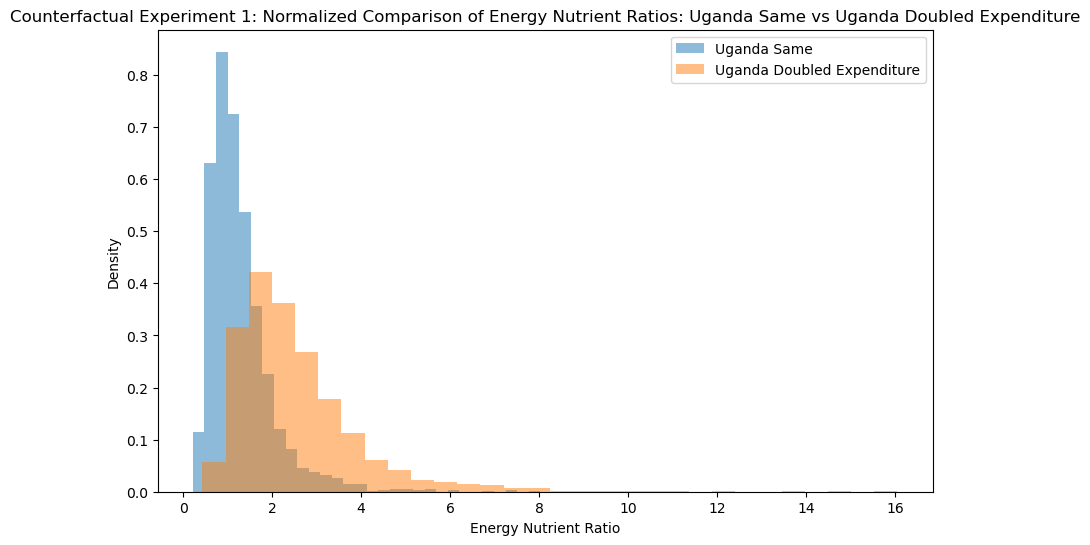

In [ ]:
xhat = result_uganda_doubled.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_uganda_doubled = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Protein'], bins=30, alpha=0.5, label='Uganda Same', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_uganda_doubled['Protein'], bins=30, alpha=0.5, label='Uganda Doubled Expenditure', density=True)

plt.title('Counterfactual Experiment 1: Normalized Comparison of Energy Nutrient Ratios: Uganda Same vs Uganda Doubled Expenditure')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

Then, to do the same for Tanzania...

In [ ]:
x_tanzania_doubled = x_tanzania * 2

# Running the CFE regression with the doubled expenditures
result_tanzania_doubled = cfe.Regression(y=np.log(x_tanzania_doubled.stack()), d=z_tanzania)

# Displaying the sorted beta values with doubled expenditures
print("For Tanzania with doubled food expenditures:")
result_tanzania_doubled.get_beta().sort_values(ascending=False)

For Tanzania with doubled food expenditures:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

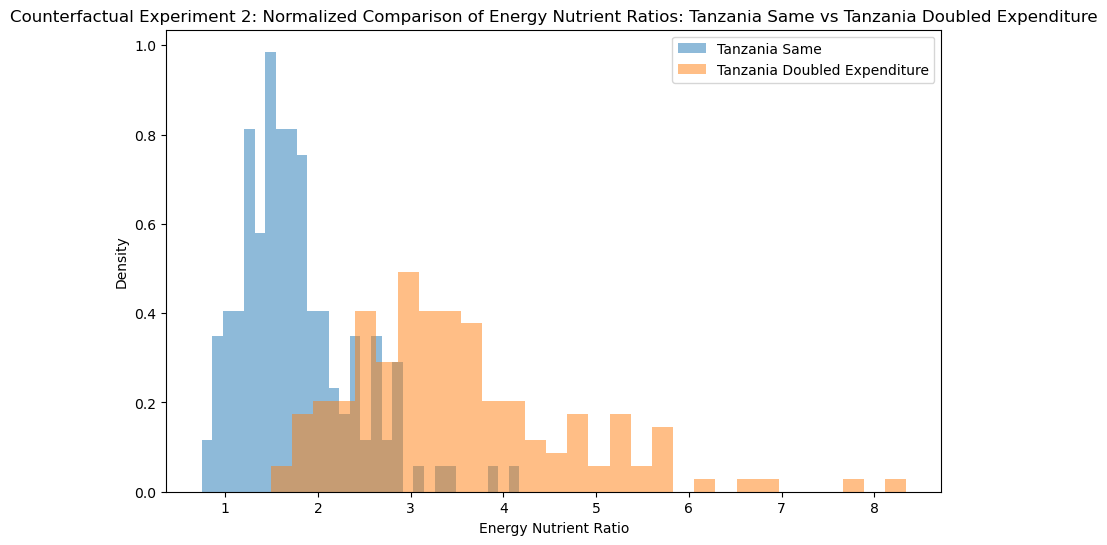

In [ ]:
xhat = result_tanzania_doubled.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania_doubled = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Protein'], bins=30, alpha=0.5, label='Tanzania Same', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania_doubled['Protein'], bins=30, alpha=0.5, label='Tanzania Doubled Expenditure', density=True)

plt.title('Counterfactual Experiment 2: Normalized Comparison of Energy Nutrient Ratios: Tanzania Same vs Tanzania Doubled Expenditure')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

### Counterfactual Experiment 3: Trade
In this section, we assess how increasing trade into Tanzania for the good, "Cassava Fresh", would benefit the population's Vitamin C levels.

First, if we trade 40000 Ugandan Shillings (per household) worth of Tanzanian beef into Uganda, how will this benefit Ugandan Protein consumption?

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_1708/3449921227.py:24: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  nutrient_ratio_uganda_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()


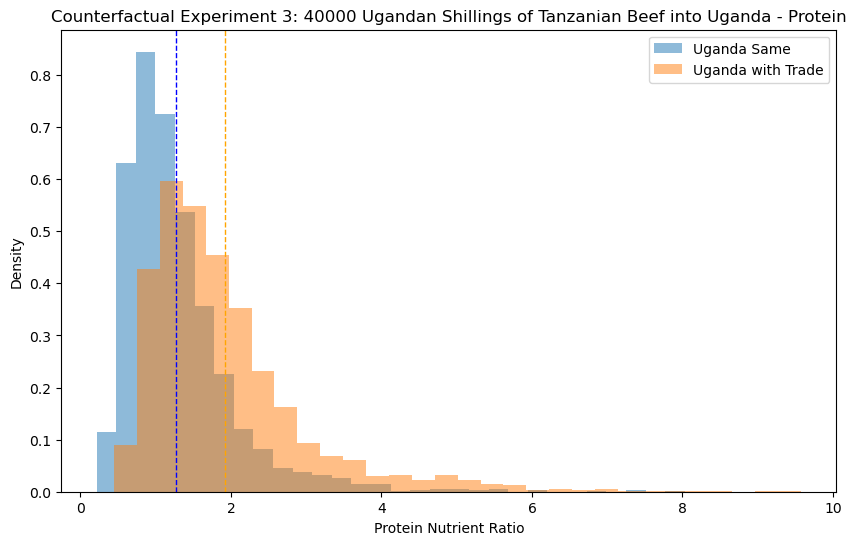

In [ ]:
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

xhat = result_uganda.predicted_expenditures()

xhat.loc[xhat.index.get_level_values('j') == 'Beef'] += 40000

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_uganda_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

plt.hist(nutrient_ratio_uganda['Protein'], bins=30, alpha=0.5, label='Uganda Same', density=True)
plt.axvline(nutrient_ratio_uganda['Protein'].mean(), color='blue', linestyle='dashed', linewidth=1)

plt.hist(nutrient_ratio_uganda_2['Protein'], bins=30, alpha=0.5, label='Uganda with Trade', density=True)
plt.axvline(nutrient_ratio_uganda_2['Protein'].mean(), color='orange', linestyle='dashed', linewidth=1)

plt.title('Counterfactual Experiment 3: 40000 Ugandan Shillings of Tanzanian Beef into Uganda - Protein')
plt.xlabel('Protein Nutrient Ratio')
plt.ylabel('Density') 
plt.legend(loc='upper right')

plt.show()

Tanzania, a wealthier country than Uganda, can gain a lot from this trade as well. First, Tanzania's Vitamin C levels are low - can trading Cassava from Uganda into Tanzania help? Here we trade 5000 Tanzanian shillings worth of Cassava from Uganda into Tanzania.

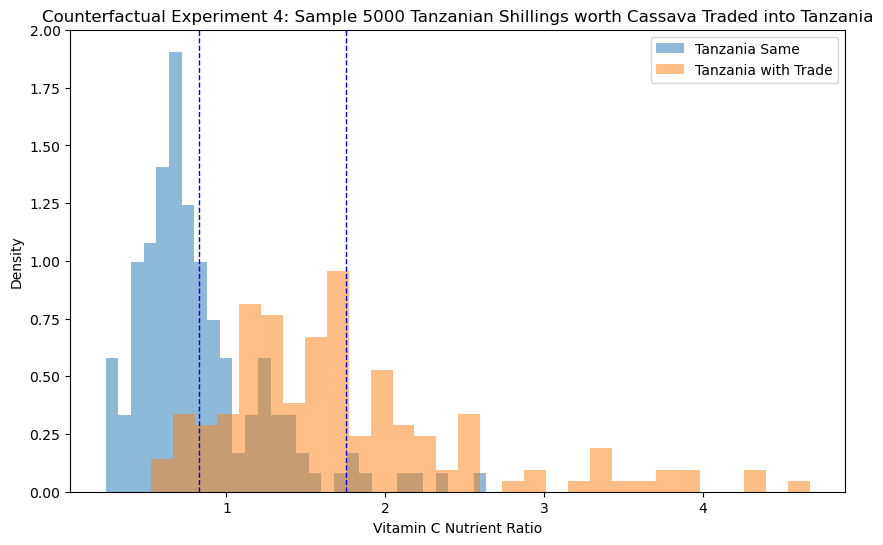

In [ ]:
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

xhat = result_tanzania.predicted_expenditures()

item_to_increase = 'Cassava Fresh'

xhat.loc[xhat.index.get_level_values('j') == item_to_increase] += 5000

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

plt.hist(nutrient_ratio_tanzania['Vitamin C'], bins=30, alpha=0.5, label='Tanzania Same', density=True)
plt.axvline(nutrient_ratio_tanzania['Vitamin C'].mean(), color='blue', linestyle='dashed', linewidth=1)


plt.hist(nutrient_ratio_tanzania_2['Vitamin C'], bins=30, alpha=0.5, label='Tanzania with Trade', density=True)
plt.axvline(nutrient_ratio_tanzania_2['Vitamin C'].mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title('Counterfactual Experiment 4: Sample 5000 Tanzanian Shillings worth Cassava Traded into Tanzania')
plt.xlabel('Vitamin C Nutrient Ratio')
plt.ylabel('Density') 
plt.legend(loc='upper right')

plt.show()

Overall, our counterfactual experiments point to one policy idea that can solve two big problems:

- Problem 1: Tanzanians do not get enough Vitamin C.
- Problem 2: Ugandans do not get enough Protein.

Our solution:

- Tanzanians trade beef into Uganda, Ugandas trade Cassava into Tanzania.

The solution's simulated predictions:

- Both Uganda and Tanzania achieving average nutrient ratios greater than 1 for both protein and Vitamin C.

**Conclusion: Trade can help neighboring countries solve national nutritional deficiencies.**